# **STRESS PREDICTION**

#overview

The objective of develop this machine learning moel capable of predicting the person is stressed.
The dataset used for this project is from kaggle.
The Dataset includes Nervousness,Unabletocontrol,Worry,TroubleinRelaxation,Restlessness,Irritability,Fear.

#Import Libraries:

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore')

#Load Dataset:

In [ ]:
df=pd.read_csv("/content/project Dataset.csv")
df

,Nervousness,Unable to control,Worry,Trouble in Relaxation,Restlessness,Irritability,Fear,Stress
0,Severe,Moderate,Mild,No,Mild,Mild,No,Mild
1,No,No,Mild,Mild,No,Mild,Moderate,Mild
2,Severe,Severe,Mild,Severe,Severe,Mild,Severe,Severe
3,No,Severe,Severe,Mild,Severe,No,Severe,Moderate
4,Mild,No,No,No,No,No,Mild,No
...,...,...,...,...,...,...,...,...
16379,Mild,Severe,Mild,No,Moderate,No,Mild,Mild
16380,Mild,No,No,No,Severe,No,No,No
16381,No,Moderate,Moderate,Mild,Severe,No,Moderate,Mild
16382,Severe,Mild,Severe,Mild,No,Mild,Severe,Moderate


#Data Preprocessing:

In [ ]:
# Mapping categorical values to numerical values
df['Nervousness']=df['Nervousness'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Unable to control']=df['Unable to control'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Worry']=df['Worry'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Trouble in Relaxation']=df['Trouble in Relaxation'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Restlessness']=df['Restlessness'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Irritability']=df['Irritability'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Fear']=df['Fear'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df['Stress']=df['Stress'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
df

,Nervousness,Unable to control,Worry,Trouble in Relaxation,Restlessness,Irritability,Fear,Stress
0,3,2,1,0,1,1,0,1
1,0,0,1,1,0,1,2,1
2,3,3,1,3,3,1,3,3
3,0,3,3,1,3,0,3,2
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
16379,1,3,1,0,2,0,1,1
16380,1,0,0,0,3,0,0,0
16381,0,2,2,1,3,0,2,1
16382,3,1,3,1,0,1,3,2


#Data Exploration:

In [ ]:
# Display value counts of the target variable
df["Stress"].value_counts()

1    7869
2    7456
3     736
0     323
Name: Stress, dtype: int64

In [ ]:
# Check for missing values
df.isna().sum()

Nervousness              0
Unable to control        0
Worry                    0
Trouble in Relaxation    0
Restlessness             0
Irritability             0
Fear                     0
Stress                   0
dtype: int64

In [ ]:
# Display data types of each column in the DataFrame
df.dtypes

Nervousness              int64
Unable to control        int64
Worry                    int64
Trouble in Relaxation    int64
Restlessness             int64
Irritability             int64
Fear                     int64
Stress                   int64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
X

,Nervousness,Unable to control,Worry,Trouble in Relaxation,Restlessness,Irritability,Fear
0,3,2,1,0,1,1,0
1,0,0,1,1,0,1,2
2,3,3,1,3,3,1,3
3,0,3,3,1,3,0,3
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
16379,1,3,1,0,2,0,1
16380,1,0,0,0,3,0,0
16381,0,2,2,1,3,0,2
16382,3,1,3,1,0,1,3


In [ ]:
y=df.iloc[:,-1]
y

0        1
1        1
2        3
3        2
4        0
        ..
16379    1
16380    0
16381    1
16382    2
16383    2
Name: Stress, Length: 16384, dtype: int64

#Feature Scaling:

In [ ]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.34164079,  0.4472136 , -0.4472136 , ..., -0.4472136 ,
        -0.4472136 , -1.34164079],
       [-1.34164079, -1.34164079, -0.4472136 , ..., -1.34164079,
        -0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079, -0.4472136 , ...,  1.34164079,
        -0.4472136 ,  1.34164079],
       ...,
       [-1.34164079,  0.4472136 ,  0.4472136 , ...,  1.34164079,
        -1.34164079,  0.4472136 ],
       [ 1.34164079, -0.4472136 ,  1.34164079, ..., -1.34164079,
        -0.4472136 ,  1.34164079],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 , ...,  1.34164079,
         0.4472136 ,  0.4472136 ]])

#Train-Test Split:

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train

array([[-0.4472136 ,  0.4472136 , -0.4472136 , ..., -0.4472136 ,
         1.34164079, -0.4472136 ],
       [-0.4472136 ,  0.4472136 ,  0.4472136 , ...,  1.34164079,
         1.34164079, -0.4472136 ],
       [ 0.4472136 , -0.4472136 ,  1.34164079, ...,  0.4472136 ,
         1.34164079, -0.4472136 ],
       ...,
       [ 0.4472136 ,  0.4472136 ,  1.34164079, ...,  1.34164079,
        -0.4472136 ,  1.34164079],
       [ 1.34164079, -1.34164079, -0.4472136 , ..., -0.4472136 ,
        -1.34164079, -0.4472136 ],
       [ 1.34164079, -1.34164079,  0.4472136 , ..., -0.4472136 ,
         0.4472136 ,  0.4472136 ]])

#Model Training and Evaluation:

In [ ]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
nb=GaussianNB()
abc=AdaBoostClassifier()
models=[rfc,nb,abc]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

RandomForestClassifier(max_depth=10, random_state=42)
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       115
           1       0.90      0.92      0.91      2380
           2       0.86      0.92      0.89      2188
           3       1.00      0.41      0.58       233

    accuracy                           0.88      4916
   macro avg       0.94      0.63      0.71      4916
weighted avg       0.89      0.88      0.87      4916

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      0.23      0.38       115
           1       0.96      1.00      0.98      2380
           2       0.92      1.00      0.96      2188
           3       1.00      0.21      0.35       233

    accuracy                           0.94      4916
   macro avg       0.97      0.61      0.67      4916
weighted avg       0.95      0.94      0.93      4916

AdaBoostClassifier()
              precision    recall  f1-scor

#Predict New Data Point:

In [ ]:
y_new=nb.predict(scaler.transform([[3,1,3,1,3,1,3]]))
if y_new==0:
  print("NO")
elif y_new==1:
  print("Mild")
elif y_new==2:
  print("Moderate")
elif y_new==3:
  print("Severe")



Moderate


#**Visualisation**

# Confusion Matrix

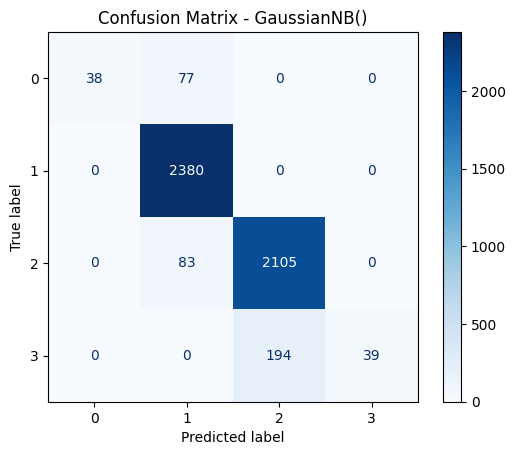

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix - {nb}")
plt.show()



#Correlation matrix

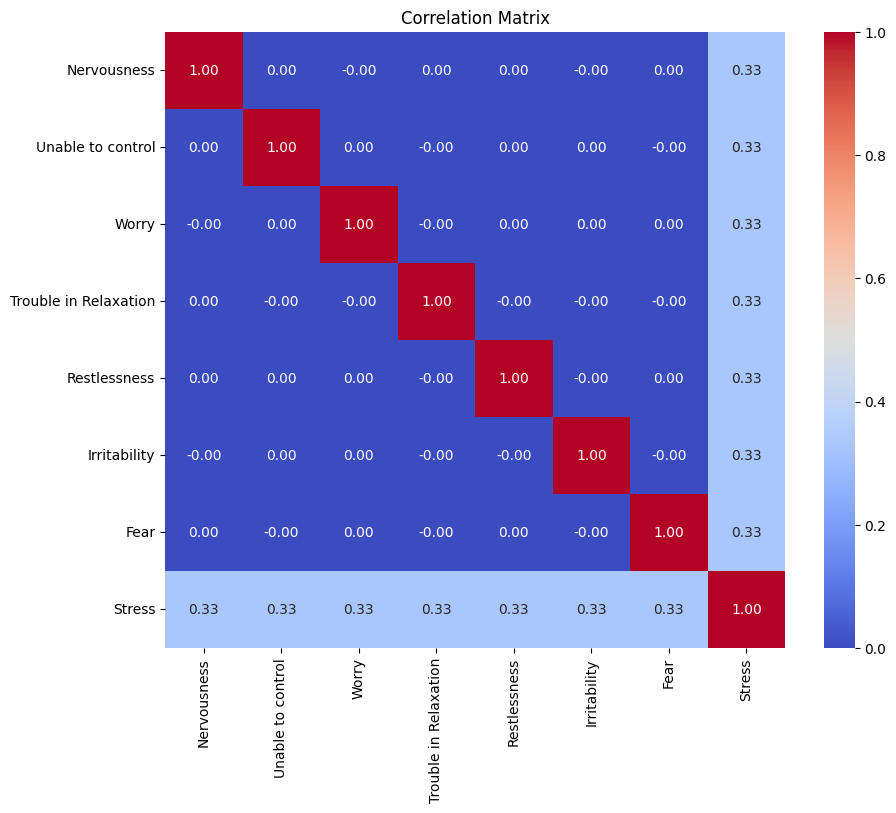

In [ ]:
# Display a heatmap for correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Histogram

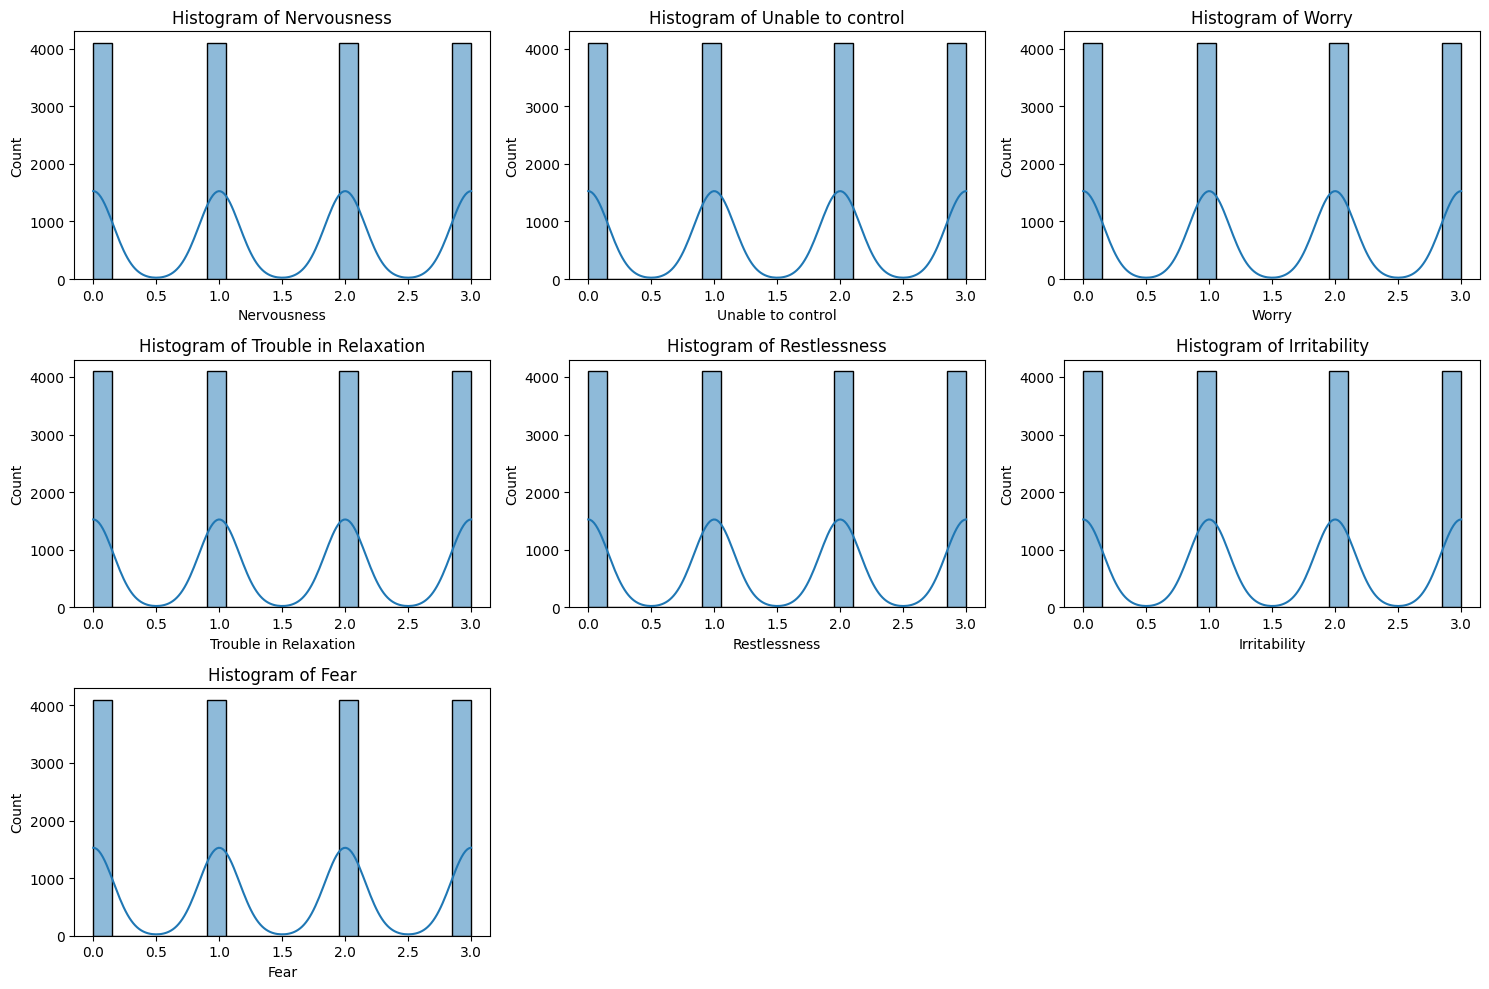

In [ ]:
# Visualize histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#Bar Plot

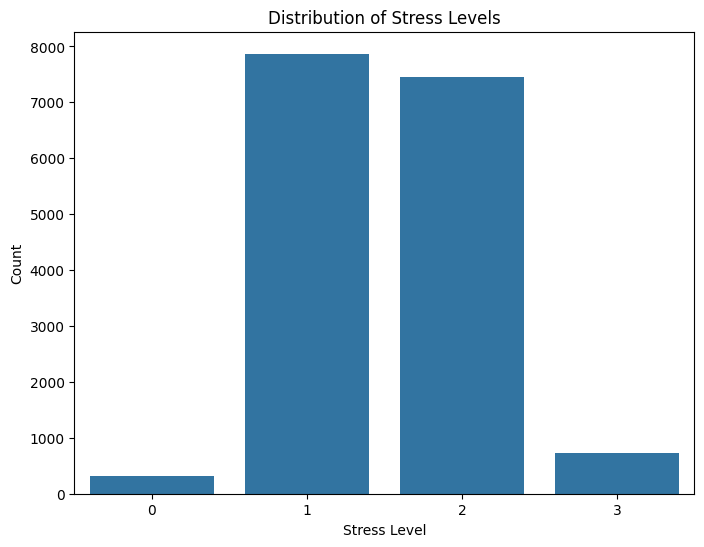

In [ ]:
# Visualize bar plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress', data=df)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


#Pair Plot

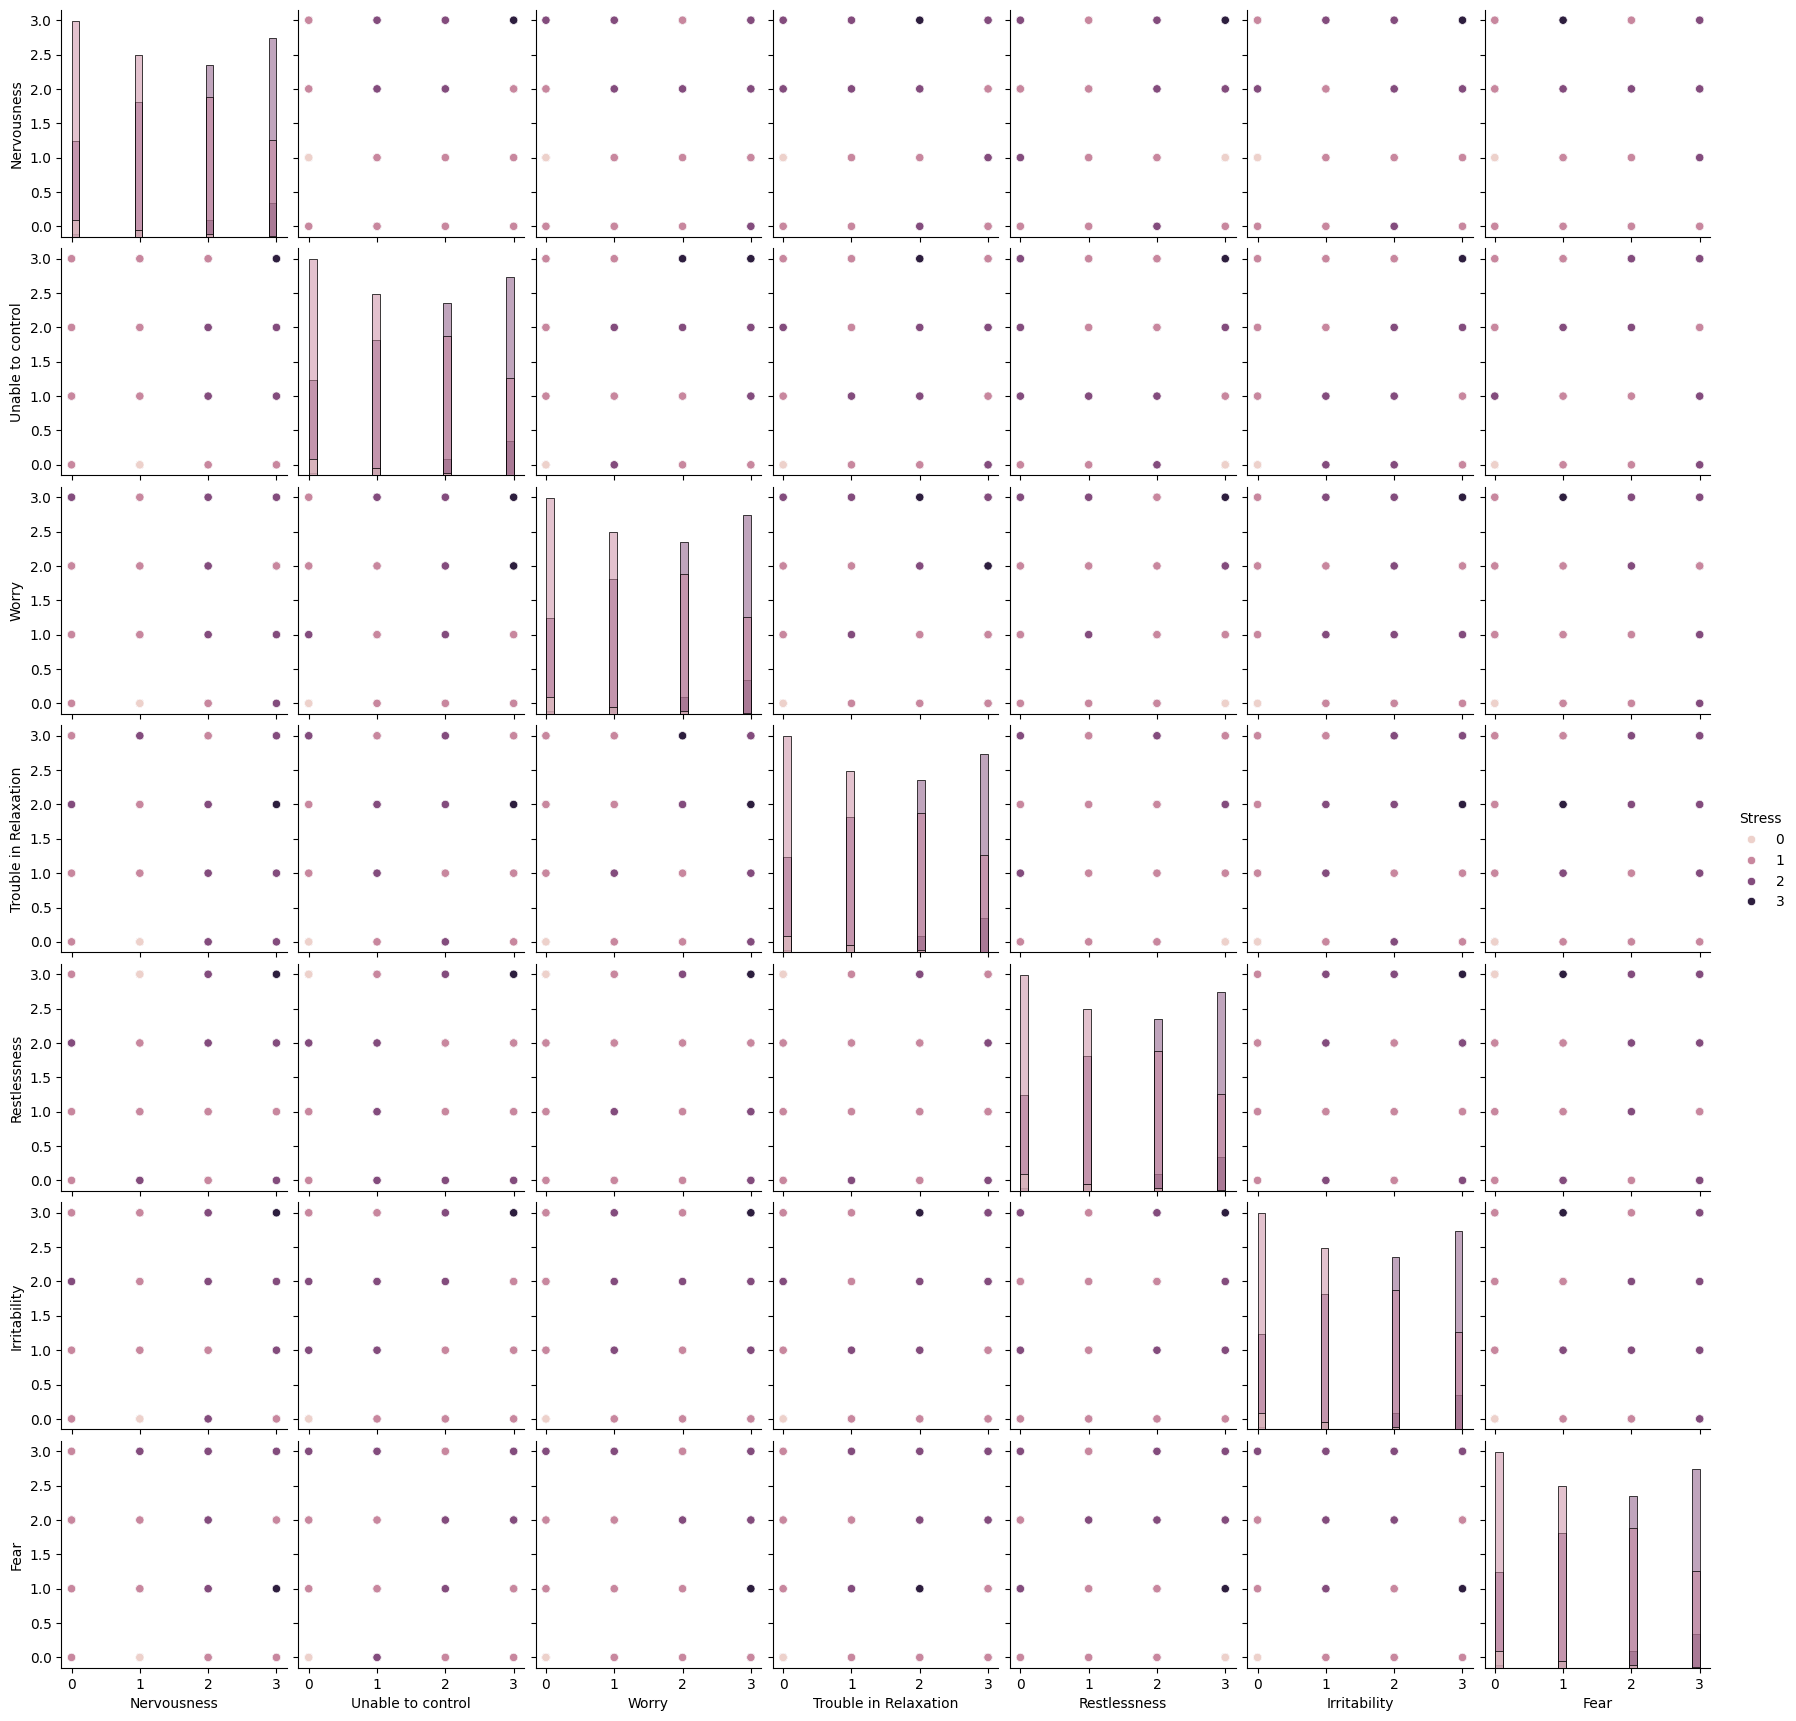

In [ ]:
# Display a pairplot for visualizing relationships between features
sns.pairplot(df, hue="Stress", diag_kind="hist")
plt.show()


#Install Streamlit:

In [ ]:
pip install streamlit

#Write Streamlit App Script:

In [ ]:
%%writefile app.py

Overwriting app.py


#Get Public IP Address using wget and icanhazip.com:

In [ ]:
! wget -q -o - ipv4.icanhazip.com

#Run Streamlit App and Expose Locally with LocalTunnel:

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session c09a61b2690f216


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.80.171:8501

npx: installed 22 in 2.532s
your url is: https://violet-papers-mix.loca.lt


#Stream lit app code

In [ ]:
# import pandas as pd
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import ConfusionMatrixDisplay,classification_report
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import warnings
# df=pd.read_csv("/content/project Dataset.csv")
# df['Nervousness']=df['Nervousness'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Unable to control']=df['Unable to control'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Worry']=df['Worry'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Trouble in Relaxation']=df['Trouble in Relaxation'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Restlessness']=df['Restlessness'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Irritability']=df['Irritability'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Fear']=df['Fear'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df['Stress']=df['Stress'].map({'No':0,"Mild":1,"Moderate":2,'Severe':3})
# df["Stress"].value_counts()
# X=df.iloc[:,:-1]
# y=df.iloc[:,-1]
# scaler = StandardScaler()
# X_scaled=scaler.fit_transform(X)
# X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
# nb=GaussianNB()
# nb.fit(X_train,y_train)
# y_pred=nb.predict(X_test)
# import streamlit as st
# st.title("STRESS ANALYSIS")
# Nervousness = st.number_input("Nervousness", min_value=0, max_value=3, value=0, step=1)
# Unabletocontrol = st.number_input("Unable to control	", min_value=0, max_value=3, value=0, step=1)
# Worry= st.number_input("Worry", min_value=0, max_value=3, value=0, step=1)
# TroubleinRelaxation = st.number_input("Trouble in Relaxation", min_value=0, max_value=3, value=0, step=1)
# Restlessness=st.number_input("Restlessness", min_value=0, max_value=3, value=0, step=1)
# Irritability=st.number_input("Irritability", min_value=0, max_value=3, value=0, step=1)
# Fear=st.number_input("Fear", min_value=0, max_value=3, value=0, step=1)
# if st.button("Submit"):
#  y_new= nb.predict([[Nervousness,Unabletocontrol,Worry,TroubleinRelaxation,Restlessness,Irritability,Fear]])
#  st.subheader("Analysis")
#  if y_new==0:
#   st.write("NO")
#  elif y_new==1:
#   st.write("Mild")
#  elif y_new==2:
#   st.write("Moderate")
#  elif y_new==3:
#   st.write("Severe")